In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/sample_submission.csv
/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_test.csv
/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_train.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_train.csv")
train_data

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.,Type
0,1,18.59,16.05,0.9066,6.037,3.860,6.001,5.877,2
1,2,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
2,3,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
3,4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795,2
4,5,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,2
...,...,...,...,...,...,...,...,...,...
135,136,11.65,13.07,0.8575,5.108,2.850,5.209,5.135,3
136,137,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,2
137,138,12.15,13.45,0.8443,5.417,2.837,3.638,5.338,3
138,139,16.16,15.33,0.8644,5.845,3.395,4.266,5.795,2


In [3]:
test_data = pd.read_csv("/kaggle/input/copy-of-wheet-variety-prediction-svm-b1/wheet_test.csv")
test_df = test_data
test_data

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.
0,1,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
1,2,11.34,12.87,0.8596,5.053,2.849,3.347,5.003
2,3,14.86,14.67,0.8676,5.678,3.258,2.129,5.351
3,4,12.67,13.32,0.8977,4.984,3.135,2.300,4.745
4,5,11.82,13.40,0.8274,5.314,2.777,4.471,5.178
...,...,...,...,...,...,...,...,...
65,66,15.11,14.54,0.8986,5.579,3.462,3.128,5.180
66,67,18.14,16.12,0.8772,6.059,3.563,3.619,6.011
67,68,11.21,13.13,0.8167,5.279,2.687,6.169,5.275
68,69,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [4]:
train_data.isnull().sum()
#theres no null values in the dataset

ID                      0
area                    0
perimeter               0
compactness             0
kernelLength            0
kernelWidth             0
asymmetryCoefficient    0
kernelGrooveLength.     0
Type                    0
dtype: int64

In [5]:
X = train_data.iloc[:, 1:-1] # Exclude the first column and the last column
y = train_data.iloc[:, -1]
test_data = test_data.iloc[:,1:]

In [6]:
test_data

,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.
0,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
1,11.34,12.87,0.8596,5.053,2.849,3.347,5.003
2,14.86,14.67,0.8676,5.678,3.258,2.129,5.351
3,12.67,13.32,0.8977,4.984,3.135,2.300,4.745
4,11.82,13.40,0.8274,5.314,2.777,4.471,5.178
...,...,...,...,...,...,...,...
65,15.11,14.54,0.8986,5.579,3.462,3.128,5.180
66,18.14,16.12,0.8772,6.059,3.563,3.619,6.011
67,11.21,13.13,0.8167,5.279,2.687,6.169,5.275
68,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
# Preprocess the data: Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
test_data = scaler.transform(test_data)

In [10]:
# Train and evaluate the SVM model
kernel_functions = ["linear", "poly", "rbf"]
C_values = [0.1, 1, 10, 100]

In [11]:
for kernel in kernel_functions:
    for C in C_values:
        # Create SVM classifier with the specified kernel and C value
        svm_classifier = SVC(kernel=kernel, C=C, random_state=42)
        
        # Train the model
        svm_classifier.fit(X_train_scaled, y_train)
        
        # Make predictions on the test set
        y_pred = svm_classifier.predict(X_test_scaled)
        
        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"Kernel: {kernel}, C: {C}, Accuracy: {accuracy}")

Kernel: linear, C: 0.1, Accuracy: 0.875
Kernel: linear, C: 1, Accuracy: 0.9285714285714286
Kernel: linear, C: 10, Accuracy: 0.9464285714285714
Kernel: linear, C: 100, Accuracy: 0.9642857142857143
Kernel: poly, C: 0.1, Accuracy: 0.8928571428571429
Kernel: poly, C: 1, Accuracy: 0.9285714285714286
Kernel: poly, C: 10, Accuracy: 0.9642857142857143
Kernel: poly, C: 100, Accuracy: 0.9642857142857143
Kernel: rbf, C: 0.1, Accuracy: 0.9107142857142857
Kernel: rbf, C: 1, Accuracy: 0.9285714285714286
Kernel: rbf, C: 10, Accuracy: 0.9285714285714286
Kernel: rbf, C: 100, Accuracy: 0.9285714285714286


In [12]:
model = SVC(kernel ="linear", C=100, random_state=42)
model.fit(X_train_scaled, y_train)

SVC(C=100, kernel='linear', random_state=42)

In [13]:
# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=7)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.83333333 0.83333333 1.         0.75       0.91666667 0.91666667
 0.83333333]
Average Cross-Validation Accuracy: 0.8690476190476192


In [14]:
predictions = model.predict(test_data)

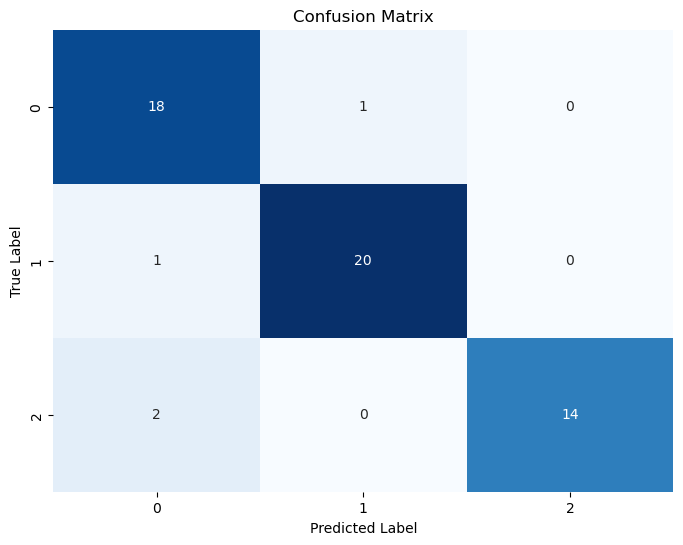

In [15]:
import seaborn as sns
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        19
           2       0.95      0.95      0.95        21
           3       1.00      0.88      0.93        16

    accuracy                           0.93        56
   macro avg       0.94      0.92      0.93        56
weighted avg       0.93      0.93      0.93        56



In [17]:
#Create the submission file
submission = pd.DataFrame({"ID": test_df["ID"], "Type": predictions})
submission.to_csv("submission.csv", index=False)

In [18]:
submission

,ID,Type
0,1,2
1,2,3
2,3,1
3,4,1
4,5,3
...,...,...
65,66,1
66,67,2
67,68,3
68,69,1
